In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/home/mohamed/Downloads/Compressed/bank+marketing/bank-additional-full.csv',sep=';')

In [4]:
data=data.drop_duplicates()

In [5]:
data['age_catagore']=pd.cut(data['age'],bins=[17,25,35,55,90],labels=['Young', 'Adult', 'Middle Age', 'retired'])

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_catagore'],
      dtype='object')

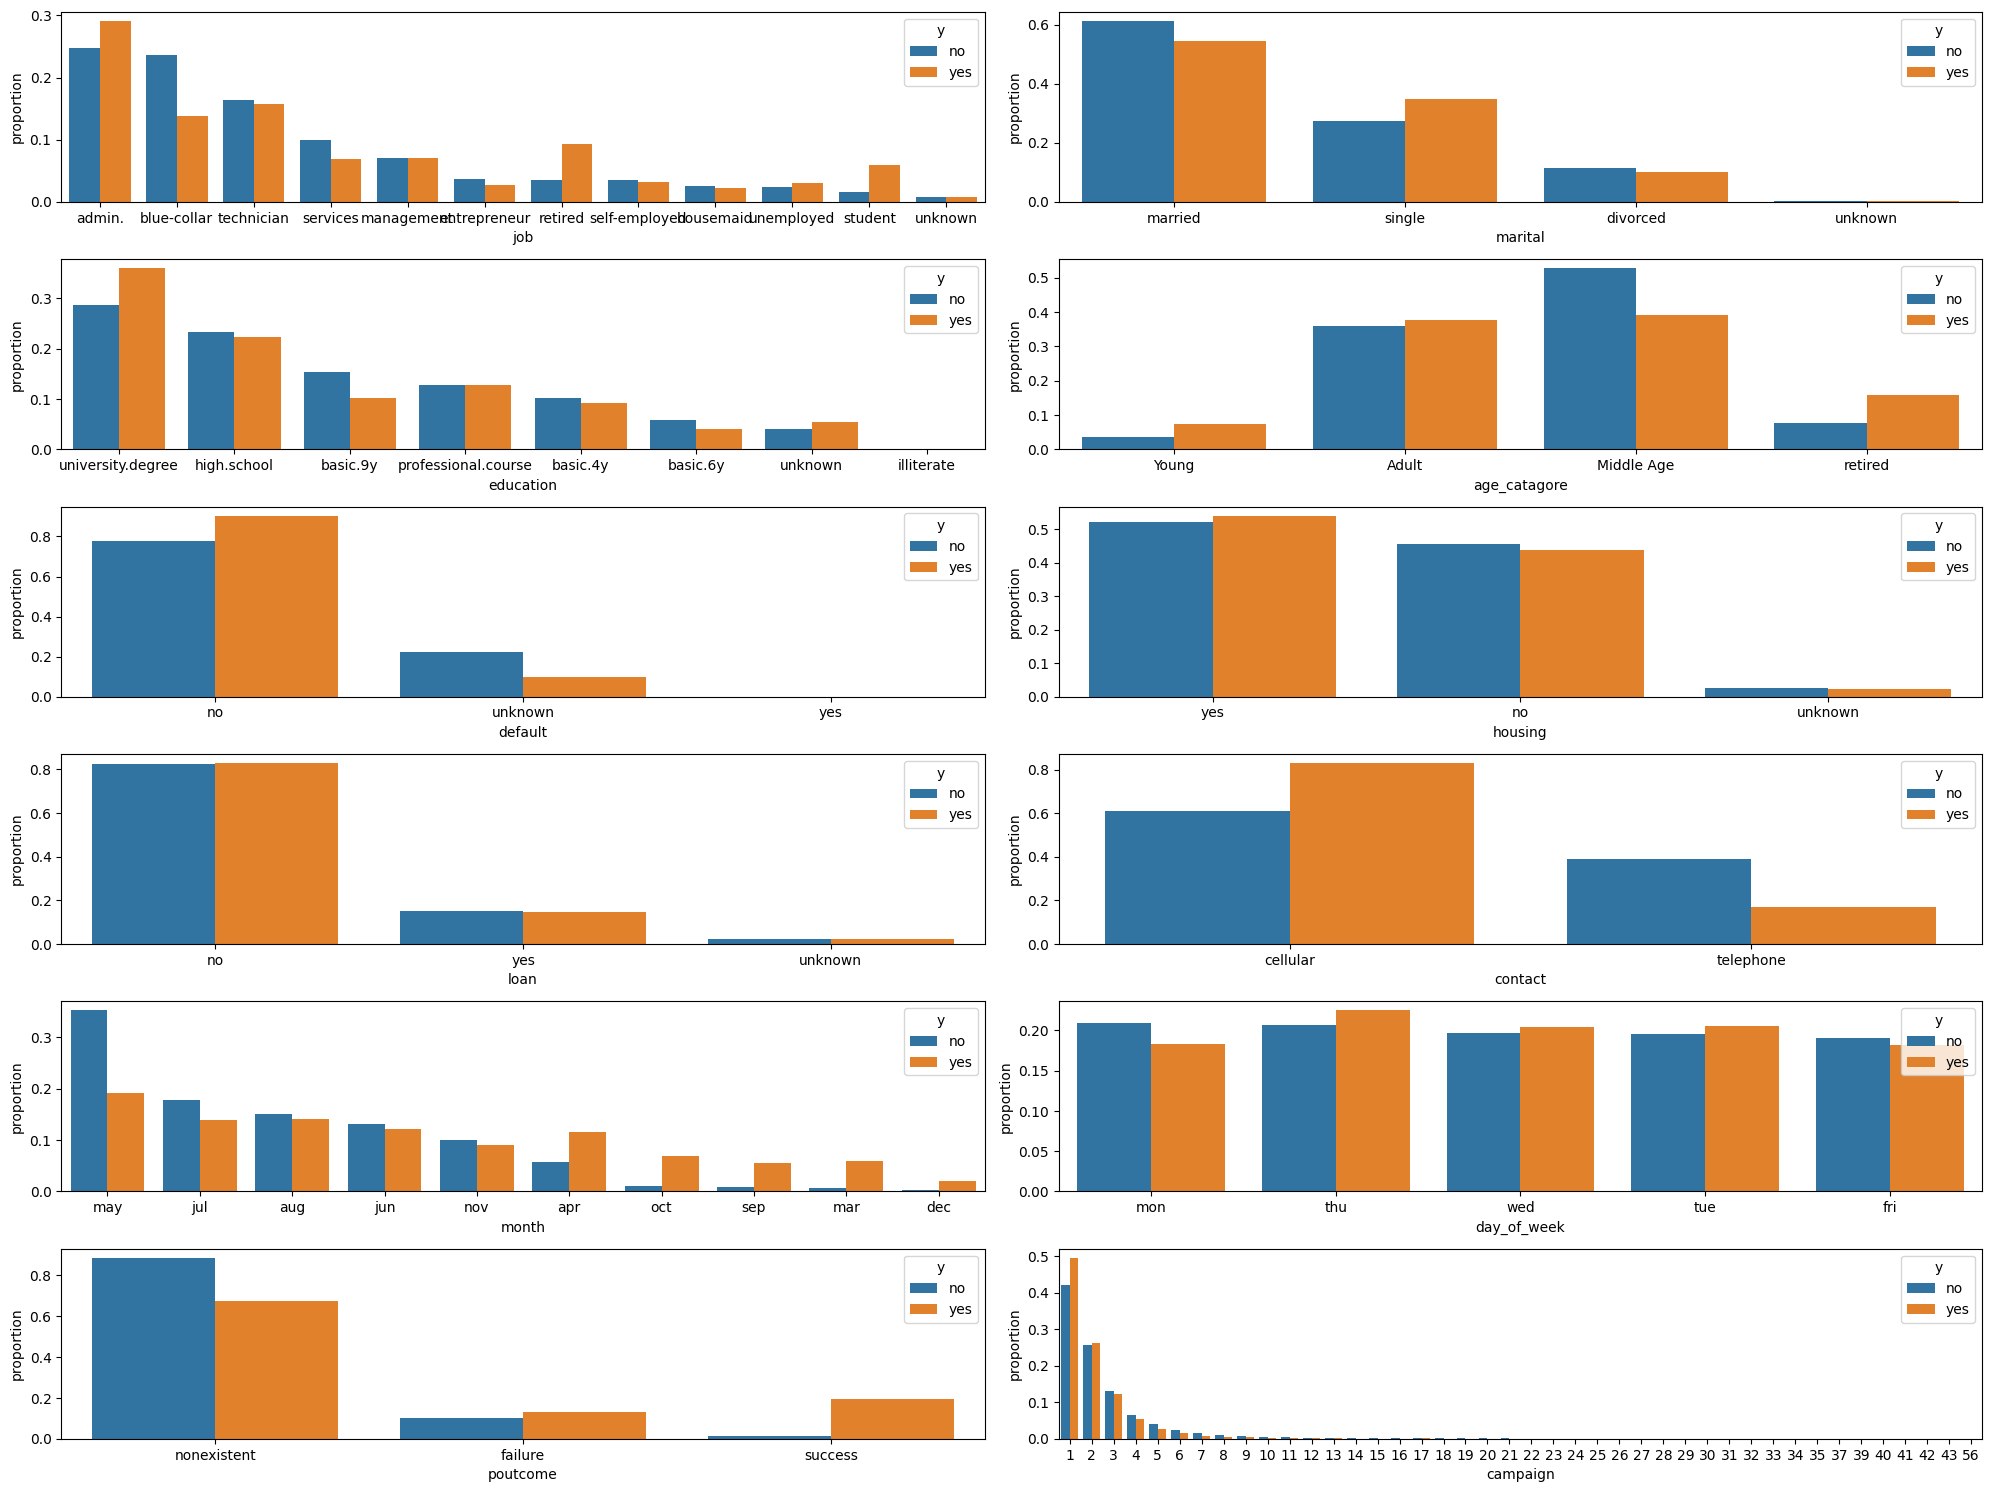

In [7]:
fig,axes=plt.subplots(ncols=2,nrows=6,figsize=(20,15))
axes=axes.flatten()
for i ,call in enumerate( data[['job','marital','education','age_catagore','default','housing','loan','contact','month','day_of_week','poutcome','campaign']]):
    data_gro=data.groupby('y')[call].value_counts(normalize=True).reset_index()
    sns.barplot(data=data_gro,x=call,y='proportion',hue='y',ax=axes[i])
    fig.tight_layout(pad=1.0)

In [8]:
dec={'no':'0','yes':'1'}
data['y_numerc']=data['y'].map(dec)

In [9]:
data['y_numerc']=data['y_numerc'].astype(int)

In [10]:
data_object=data.select_dtypes('object')
data_num=data.select_dtypes('number')

In [11]:
roo_data_object=data_object.copy()

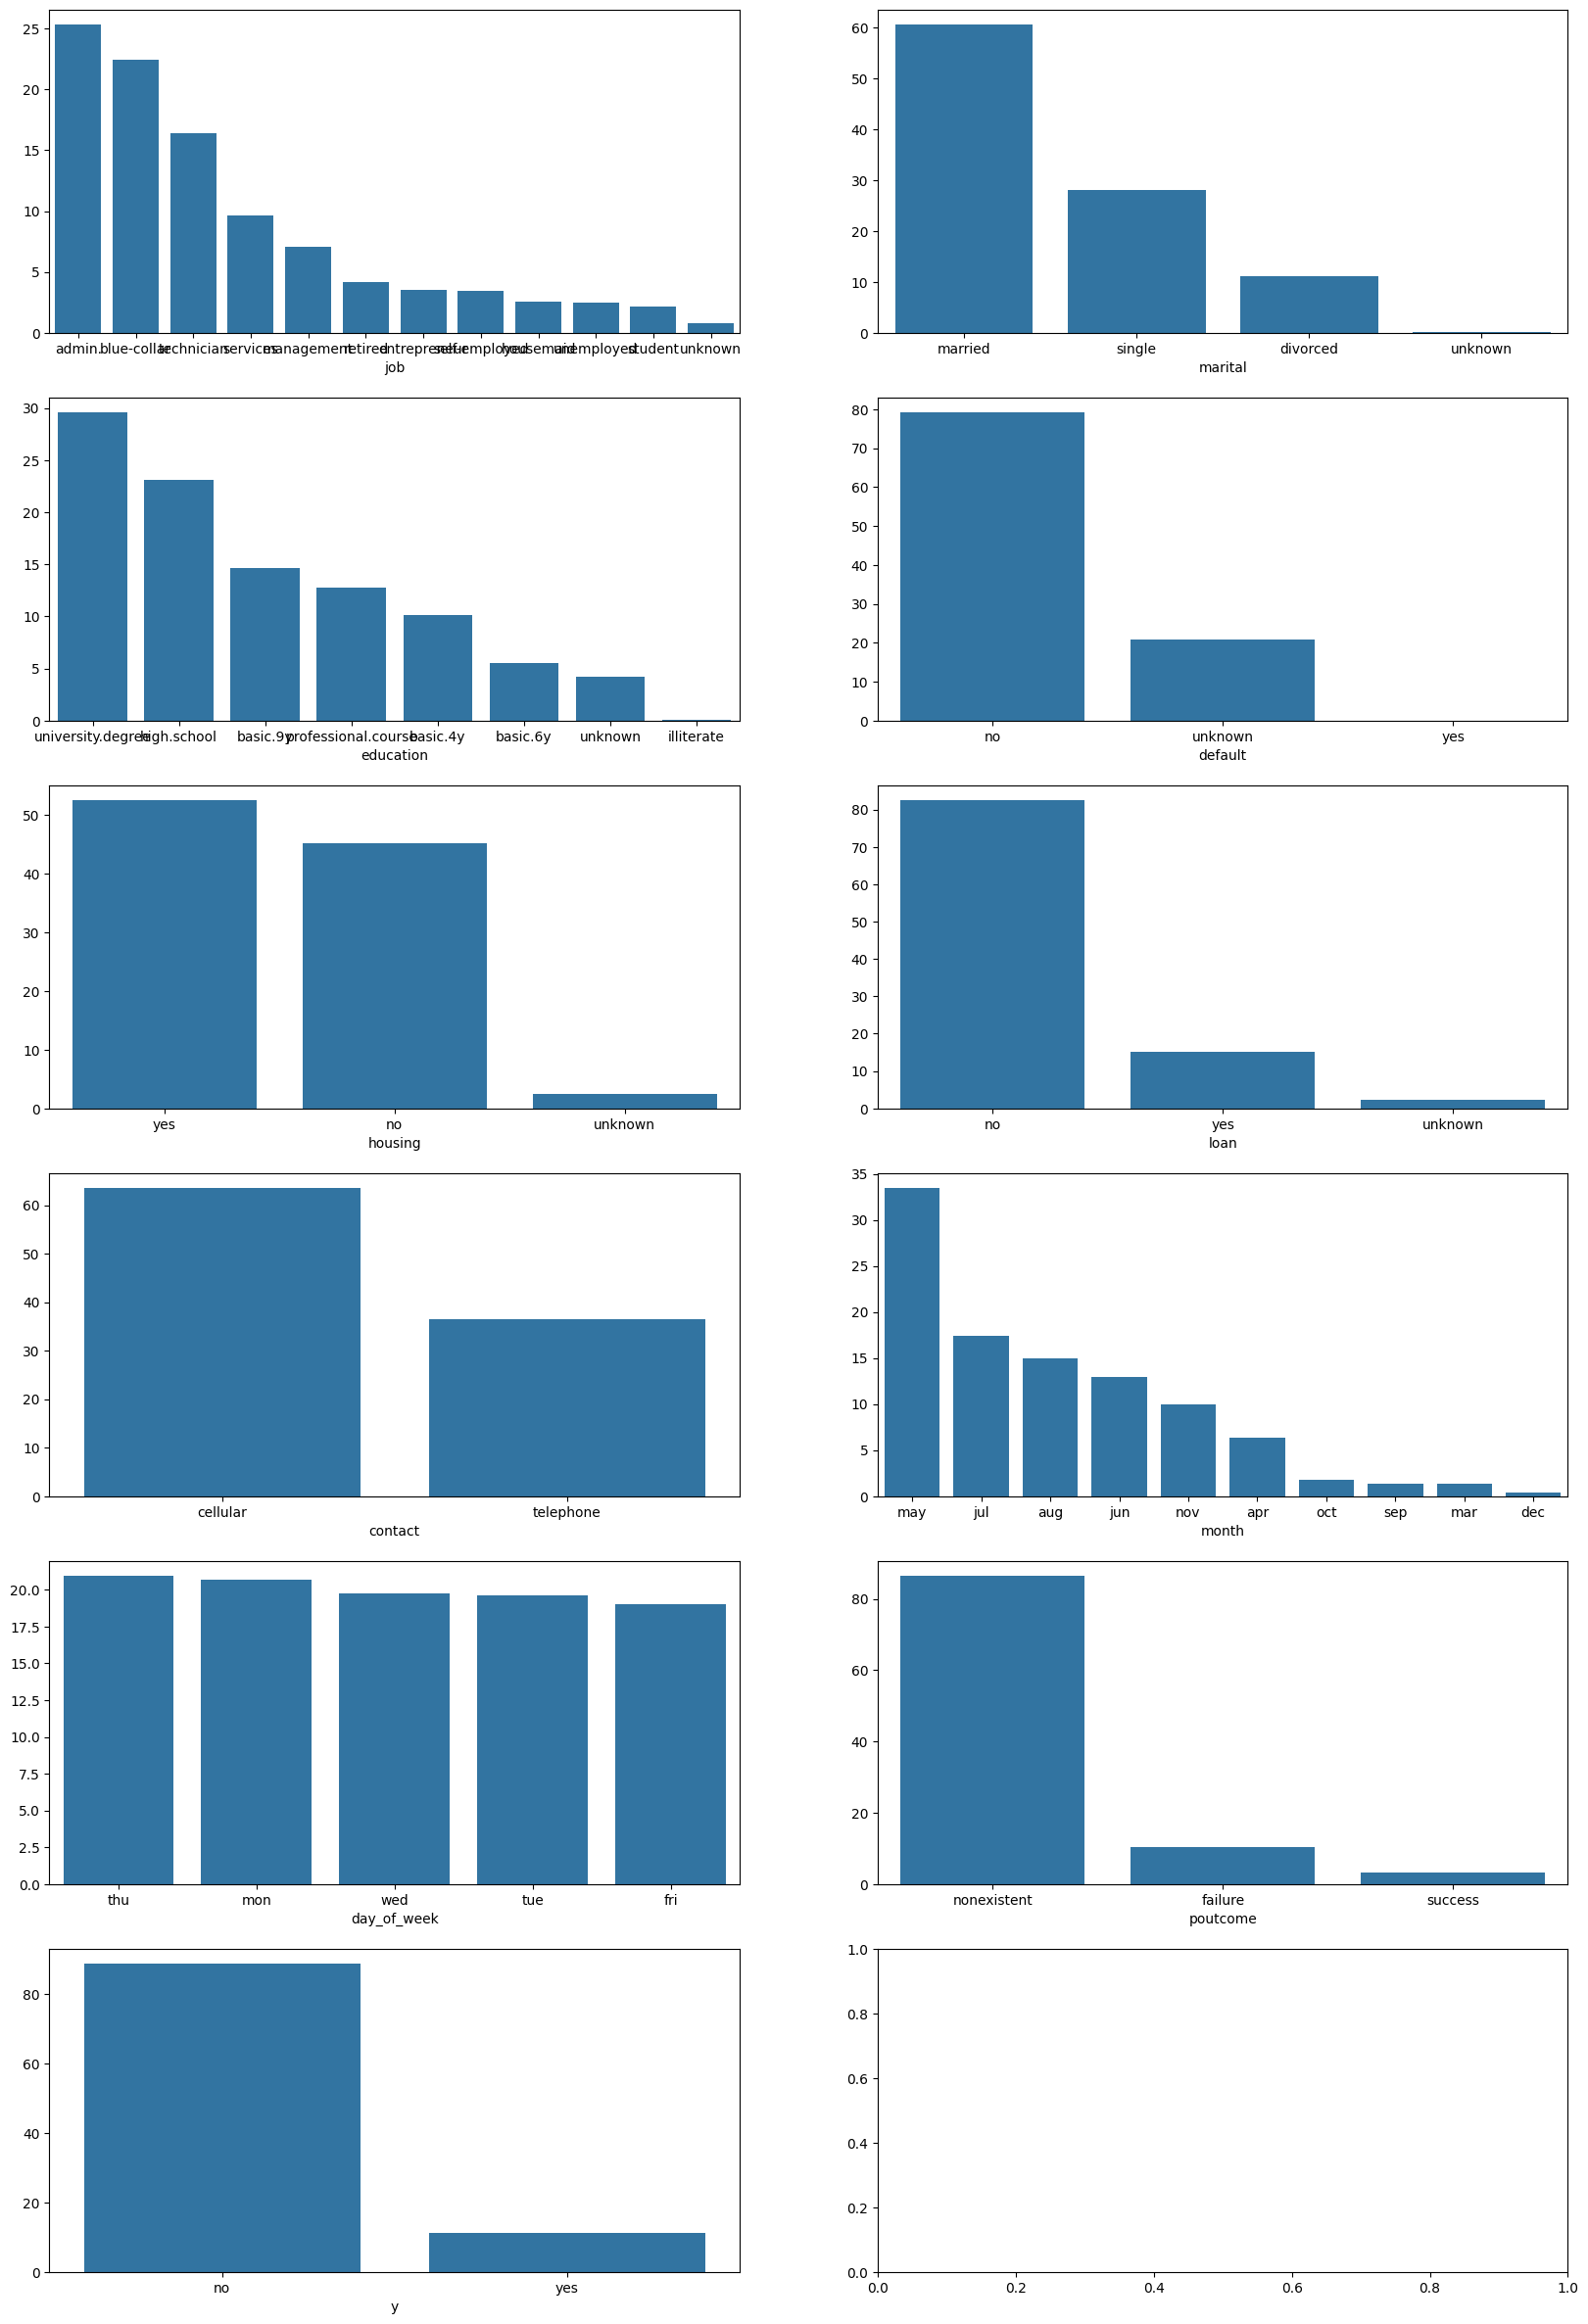

In [12]:
fig,axes=plt.subplots(nrows=6,ncols=2,figsize=(20,30))
axes = axes.flatten()
for i, call in enumerate( data_object.columns):
    category=data_object[call].value_counts(normalize=True)*100
    sns.barplot(x=category.index,y=category.values,ax=axes[i])


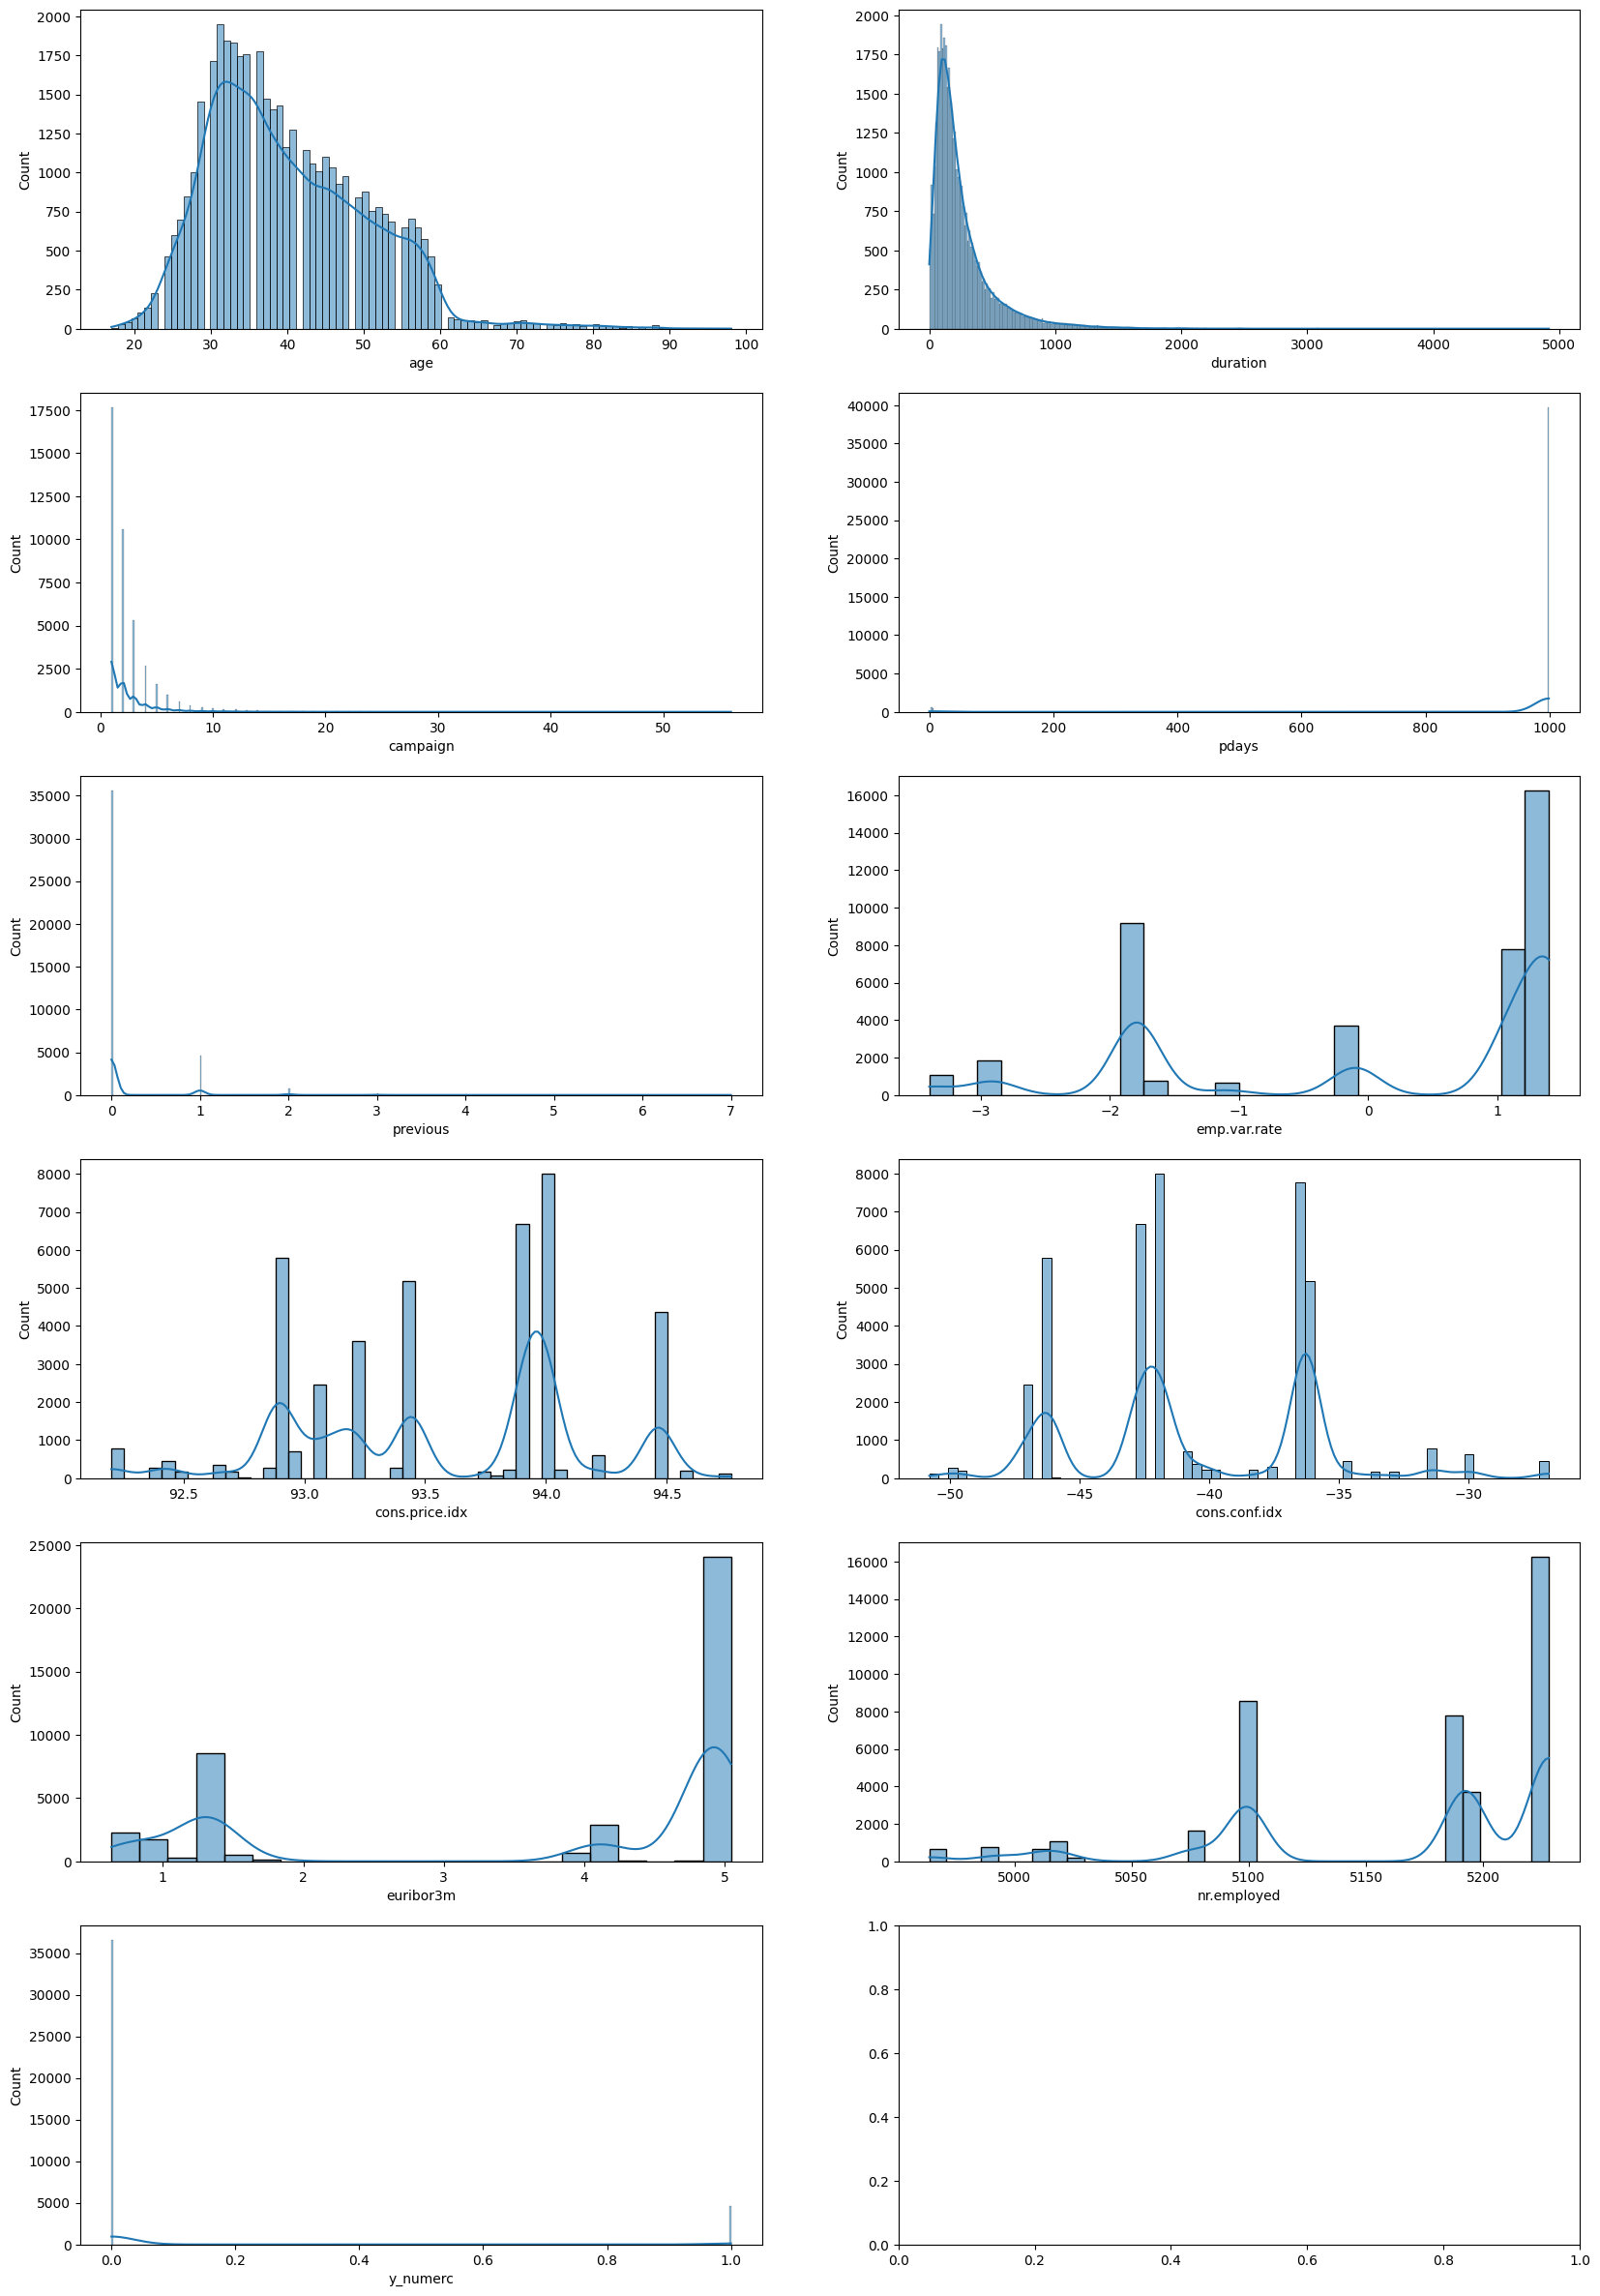

In [16]:
fig,axes=plt.subplots(nrows=6,ncols=2,figsize=(20,30))
axes = axes.flatten()
for i, call in enumerate( data_num.columns):
    sns.histplot(data_num[call],ax=axes[i],kde=True)

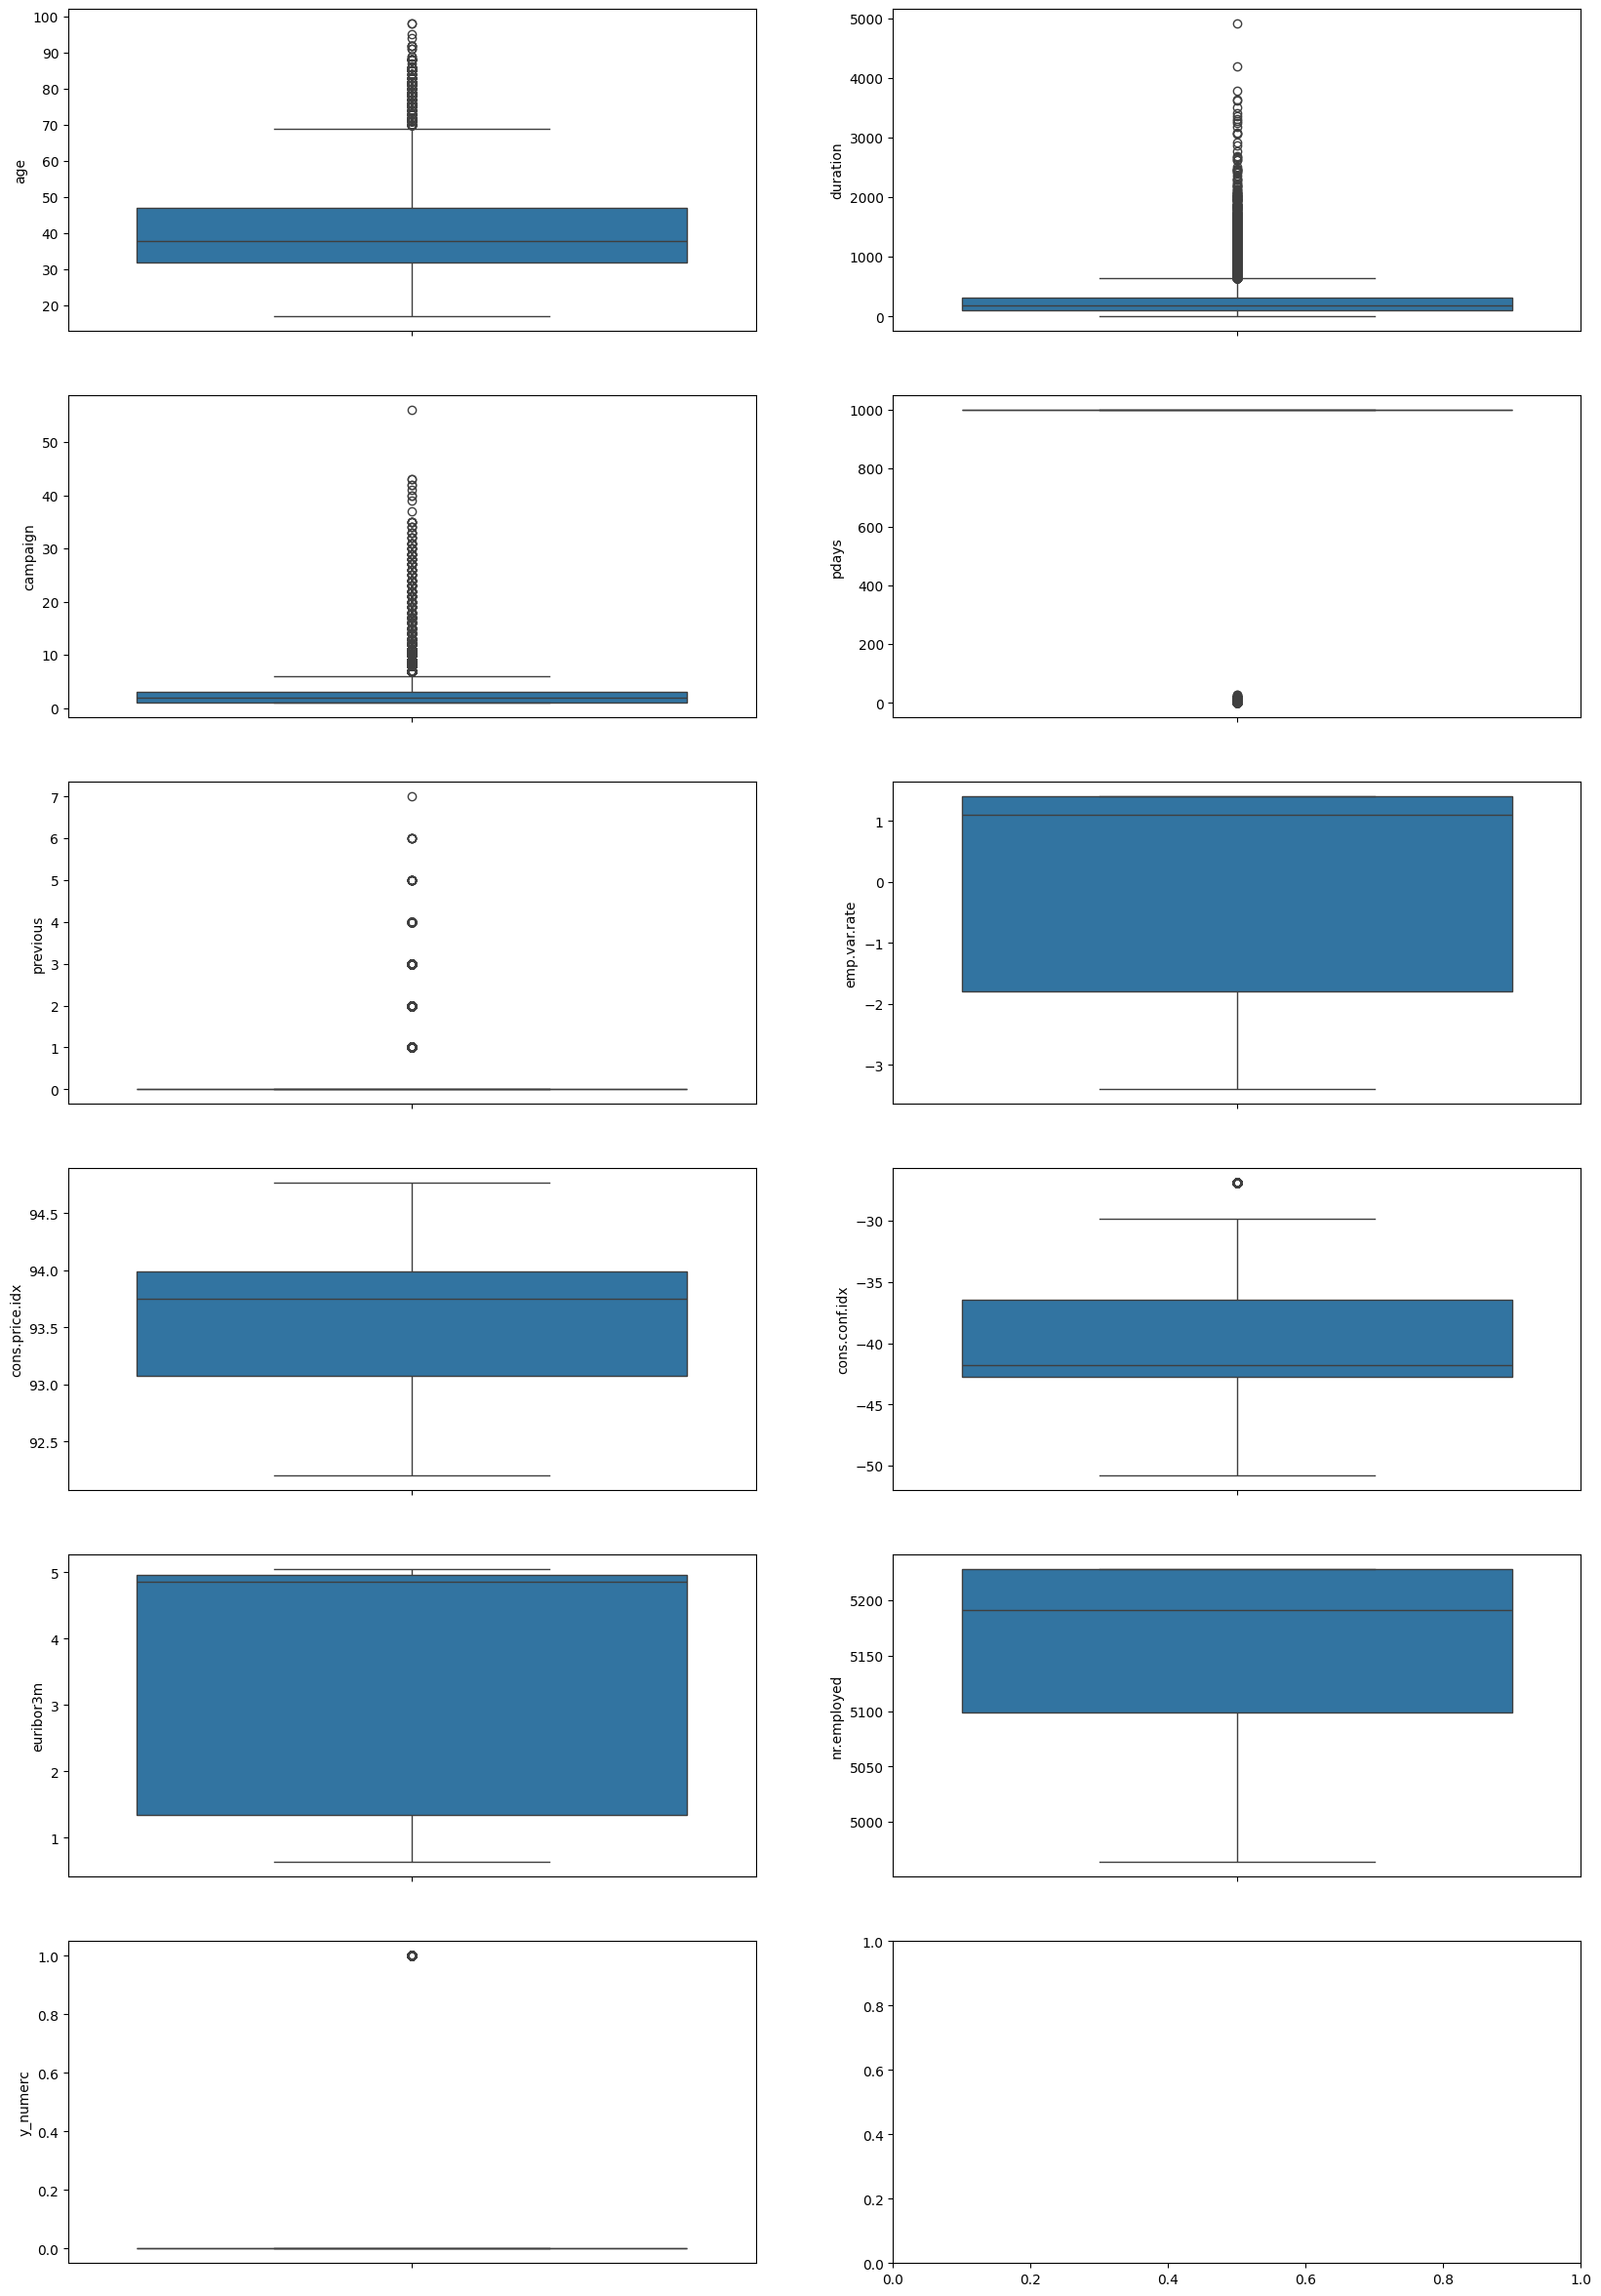

In [18]:
fig,axes=plt.subplots(nrows=6,ncols=2,figsize=(20,30))
axes = axes.flatten()
for i, call in enumerate( data_num.columns):
    sns.boxplot(data_num[call],ax=axes[i])


<Axes: >

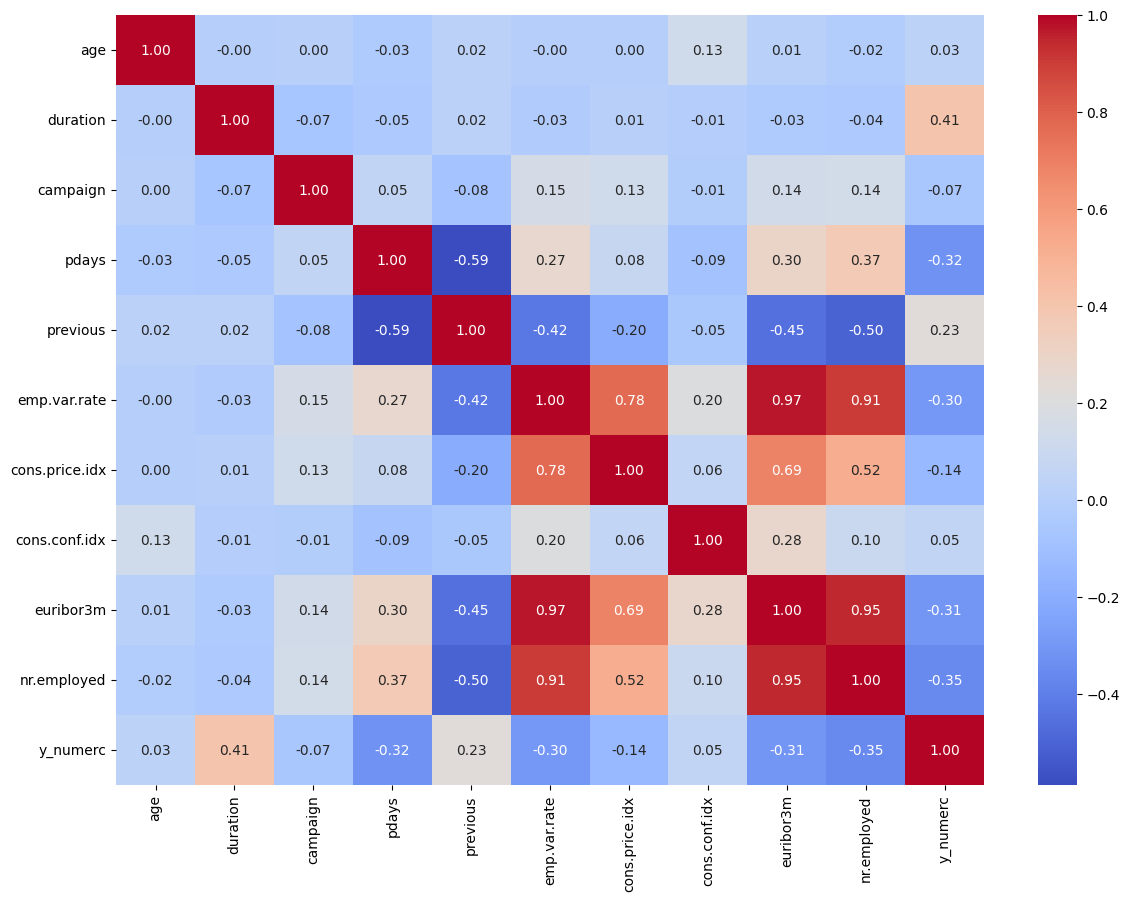

In [19]:
plt.figure(figsize=(14,10))
data_num=data.select_dtypes(include='number')
corrr_rela=data_num.corr()
sns.heatmap(corrr_rela,annot=True,fmt='.2f',cmap='coolwarm')

In [20]:
data_num.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_numerc
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [21]:

logs_list = ['duration','campaign','previous']

for col in logs_list:
    data_num[col] = np.log1p(data_num[col])  # يحسب log(1 + value) ويخزن مباشرة في العمود الأصلي


In [22]:
colums_list=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']

In [23]:
data['y'].isnull().sum()

np.int64(0)

In [24]:
from category_encoders import BinaryEncoder

encoder = BinaryEncoder(cols=colums_list)

data_object_1= encoder.fit_transform(data_object)



In [25]:
data_object_1.head()

,job_0,job_1,job_2,job_3,marital_0,marital_1,marital_2,education_0,education_1,education_2,...,month_0,month_1,month_2,month_3,day_of_week_0,day_of_week_1,day_of_week_2,poutcome_0,poutcome_1,y
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,no
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,no
2,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,no
3,0,0,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,no
4,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,no


In [26]:
data_object_1['y']=data_object_1['y'].replace({'no':0,'yes':1})

/tmp/ipykernel_2693/765502825.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_object_1['y']=data_object_1['y'].replace({'no':0,'yes':1})


In [27]:
data_object_1['y'].value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()


In [29]:
data_scaled_valuo=scaler.fit_transform(data_num)

In [30]:
data_scaled=pd.DataFrame(data_scaled_valuo,columns=data_num.columns)

In [31]:
data_scaled.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_numerc
0,1.200000,0.326262,-0.584963,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0.0
1,1.266667,-0.165723,-0.584963,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0.0
2,-0.066667,0.199766,-0.584963,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0.0
3,0.133333,-0.154038,-0.584963,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0.0
4,1.200000,0.468954,-0.584963,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0.0


In [32]:
data_scaled_reset = data_scaled.reset_index(drop=True)
data_object_reset = data_object_1.reset_index(drop=True)

In [33]:
final_data = pd.concat([data_scaled_reset, data_object_reset], axis=1)

In [34]:
final_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_0,month_1,month_2,month_3,day_of_week_0,day_of_week_1,day_of_week_2,poutcome_0,poutcome_1,y
0,1.200000,0.326262,-0.584963,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
1,1.266667,-0.165723,-0.584963,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
2,-0.066667,0.199766,-0.584963,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
3,0.133333,-0.154038,-0.584963,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
4,1.200000,0.468954,-0.584963,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0


In [48]:
df=final_data[['age','campaign','pdays','previous','euribor3m','job_0',
       'job_1', 'job_2', 'job_3', 'marital_0', 'marital_1', 'marital_2',
       'education_0', 'education_1', 'education_2', 'education_3', 'default_0',
       'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0',
       'contact_1', 'month_0', 'month_1', 'month_2', 'month_3',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'poutcome_0',
       'poutcome_1', 'y']]

In [49]:
X = df.drop(columns='y')
y = df['y']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [55]:

rf_model = RandomForestClassifier(
    n_estimators=200,  
    max_depth=14,       
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("clasefcation report \n",classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[7308    0]
 [   0  928]]
clasefcation report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7308
           1       1.00      1.00      1.00       928

    accuracy                           1.00      8236
   macro avg       1.00      1.00      1.00      8236
weighted avg       1.00      1.00      1.00      8236

